# Hip-Hop/ Rap Lyrics

In [1]:
# Imports
import requests
import os
import json
from dotenv import load_dotenv

import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
# Load .env environment variables
load_dotenv()

# Set RAPID API key
my_rapid_api_key = os.getenv("RAPID_API_KEY")

In [3]:
# Define function to use Shazam Core API

def get_chart_genre(querystring):

    url = "https://shazam-core.p.rapidapi.com/v1/charts/genre-world"

    headers = {
    'x-rapidapi-host': "shazam-core.p.rapidapi.com",
    'x-rapidapi-key': my_rapid_api_key
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()

In [4]:
# Define function to use Shazam Core API

def get_lyrics(querystring):

    url = "https://shazam-core.p.rapidapi.com/v1/tracks/details"

    headers = {
    'x-rapidapi-host': "shazam-core.p.rapidapi.com",
    'x-rapidapi-key': my_rapid_api_key
    }

    response = requests.request("GET", url, headers=headers, params=querystring)

    return response.json()

In [5]:
# Use 'Track details' endpoint to retrieve lyrics for a single track

genre = 'HIP_HOP_RAP'
limit_songs = 50
country = 'US'

querystring = {"country_code":country,"genre_code":genre,"limit":limit_songs}
chart_response = get_chart_genre(querystring)

In [6]:
# Retrieve Track IDs

track_ids=[] # song identifier
titles = [] # song name
subtitles = [] # Main artist and featured artists

for track in range(len(chart_response)):
    track_ids.append(chart_response[track]['id'])
    titles.append(chart_response[track]['title'])
    subtitles.append(chart_response[track]['subtitle'])

print(f"The number of songs retrieved is : {len(track_ids)}")

chart_songs = pd.DataFrame({"Track Name": titles, "Artists": subtitles, 'TrackIDs': track_ids}).set_index('TrackIDs')
chart_songs.head(5)

The number of songs retrieved is : 50


,Track Name,Artists
TrackIDs,,
41264695,Bananza (Belly Dancer),Akon
579792092,Own Brand Freestyle,FelixThe1st & Dreya Mac Feat. Finch Fetti
578340247,INDUSTRY BABY,Lil Nas X & Jack Harlow
577235374,edamame,bbno$ Feat. Rich Brian
565785367,น้ำแดงน้ำส้ม,JV.JARVIS


<AxesSubplot:title={'center':'Hip-Hop/Rap Artists on Top Chart'}, xlabel='Artists'>

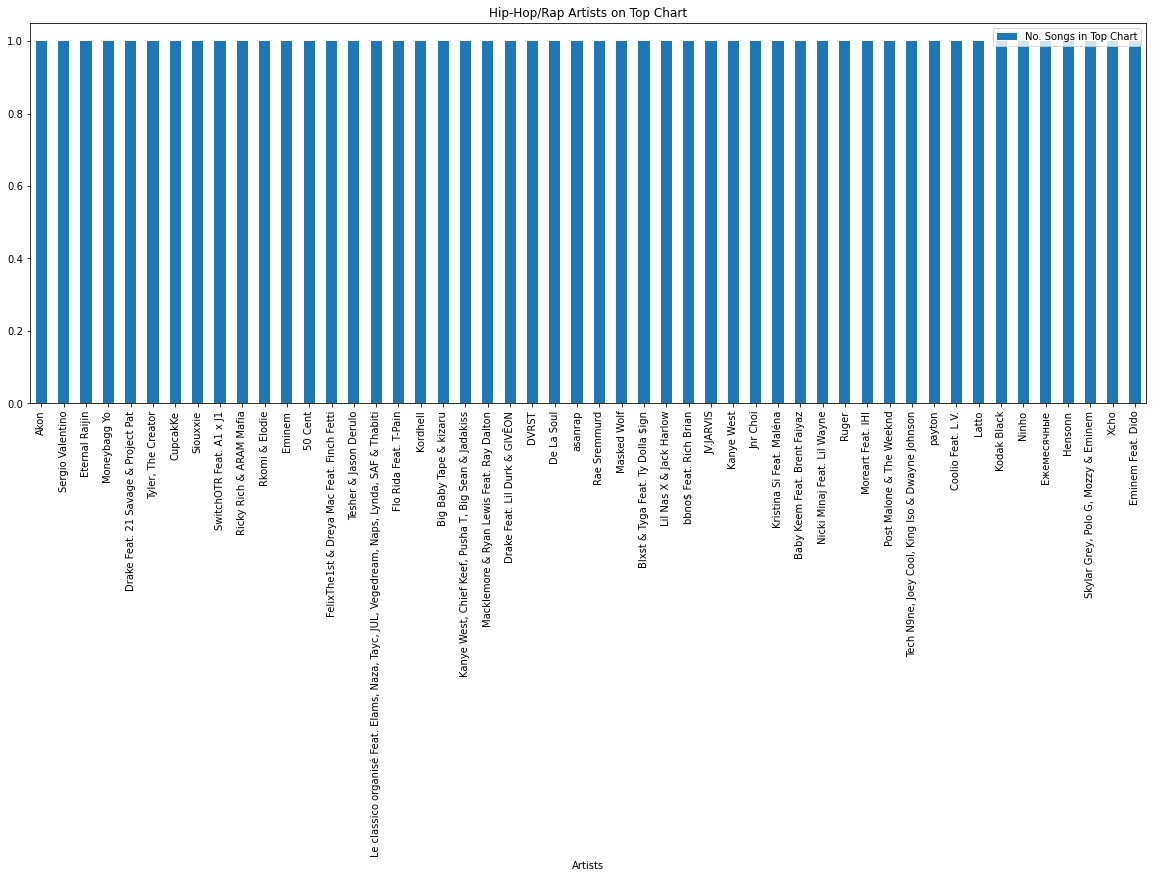

In [7]:
# Look at the data

from collections import Counter

artists_list = list(chart_songs.Artists)
artist_counts = {artist: artists_list.count(artist) for artist in artists_list} #dict with frequency of artist in top chart

artists_df = pd.DataFrame(list(artist_counts.items()),columns = ['Artists','No. Songs in Top Chart']).set_index('Artists')
artists_df.sort_values(by = 'No. Songs in Top Chart', ascending=False, inplace=True) #sort values

artists_df.plot.bar(figsize =(20, 7), title = 'Hip-Hop/Rap Artists on Top Chart')

In [8]:
# Retrieve Lyrics for all TrackIDs

track_ids  # the list created in "Search for top songs in Genre" section is required

lyrics=[]

for trackID in track_ids:
    querystring = {"track_id":trackID}
    track_details_response = get_lyrics(querystring)

    if track_details_response['sections'][1]['type'] != "LYRICS":  # Note: tracks with a type != "LYRICS" don't contain lyrics
        lyrics.append([''])
    else:
        track_lyrics = track_details_response['sections'][1]['text']
        lyrics.append(track_lyrics)

In [9]:
# Add lyrics column to dataframe with chart songs

all_lyrics = pd.Series(" ".join(map(str,song)) for song in lyrics) #each song is stored as a list, this turns each list into a string
all_lyrics_df = pd.DataFrame({"Lyrics": all_lyrics, "Track IDs": track_ids}).set_index('Track IDs')

lyrics_df = pd.concat([chart_songs, all_lyrics_df], axis=1)
lyrics_df.head(5)

,Track Name,Artists,Lyrics
41264695,Bananza (Belly Dancer),Akon,"Hey, ladies drop it down Just want to see you ..."
579792092,Own Brand Freestyle,FelixThe1st & Dreya Mac Feat. Finch Fetti,Little niggas really wan' at me (At me) Lockdo...
578340247,INDUSTRY BABY,Lil Nas X & Jack Harlow,"D-D-Daytrip took it to ten (hey) Baby back, a..."
577235374,edamame,bbno$ Feat. Rich Brian,Balls hanging low while I pop a bottle off a y...
565785367,น้ำแดงน้ำส้ม,JV.JARVIS,คัมซามิดา สวัสดีค้าบ ในกระเป๋าไม่มียา ชอบไปรัช...


In [10]:
lyrics_df

,Track Name,Artists,Lyrics
41264695,Bananza (Belly Dancer),Akon,"Hey, ladies drop it down Just want to see you ..."
579792092,Own Brand Freestyle,FelixThe1st & Dreya Mac Feat. Finch Fetti,Little niggas really wan' at me (At me) Lockdo...
578340247,INDUSTRY BABY,Lil Nas X & Jack Harlow,"D-D-Daytrip took it to ten (hey) Baby back, a..."
577235374,edamame,bbno$ Feat. Rich Brian,Balls hanging low while I pop a bottle off a y...
565785367,น้ำแดงน้ำส้ม,JV.JARVIS,คัมซามิดา สวัสดีค้าบ ในกระเป๋าไม่มียา ชอบไปรัช...
578737070,Praise God,Kanye West,"That she wrote, Speech to the Young: Speech to..."
590362040,TO THE MOON,Jnr Choi,
594606167,Chem Haskanum,Kristina Si Feat. Maléna,Ահ չեմ հասկանում ինչ ա կատարվում իմ գլխում Չեմ...
585881868,lost souls,Baby Keem Feat. Brent Faiyaz,"It's a lot of hoes in here, lot of lost souls ..."
74992451,High School,Nicki Minaj Feat. Lil Wayne,He said he came from Jamaica He owned a couple...


In [11]:
lyrics_df.describe()

,Track Name,Artists,Lyrics
count,50,50,50
unique,50,50,39
top,Bananza (Belly Dancer),Akon,
freq,1,1,12


In [131]:
#Remove empty lyrics
new_lyrics_df = lyrics_df.drop(
    [
        '565785367', 
        '594606167', 
        '590362040', 
        '545851877', 
        '587443428', 
        '594732573', 
        '370801349', 
        '586574460', 
        '594563183', 
        '583860081', 
        '587879823', 
        '594233500', 
        '570961310', 
        '583860065', 
        '595153306', 
        '467915649', 
        '535449750', 
        '594403685', 
        '594403685', 
        '570973895',
        '582919839',
        '6021080'
    ]
)
new_lyrics_df

,Track Name,Artists,Lyrics
41264695,Bananza (Belly Dancer),Akon,"Hey, ladies drop it down Just want to see you ..."
579792092,Own Brand Freestyle,FelixThe1st & Dreya Mac Feat. Finch Fetti,Little niggas really wan' at me (At me) Lockdo...
578340247,INDUSTRY BABY,Lil Nas X & Jack Harlow,"D-D-Daytrip took it to ten (hey) Baby back, a..."
577235374,edamame,bbno$ Feat. Rich Brian,Balls hanging low while I pop a bottle off a y...
578737070,Praise God,Kanye West,"That she wrote, Speech to the Young: Speech to..."
585881868,lost souls,Baby Keem Feat. Brent Faiyaz,"It's a lot of hoes in here, lot of lost souls ..."
74992451,High School,Nicki Minaj Feat. Lil Wayne,He said he came from Jamaica He owned a couple...
591239041,Dior,Ruger,"Hmm, ohh-yeah-oh Bad man lookin' good in Dior..."
590487170,One Right Now,Post Malone & The Weeknd,"Na-na-na-na, na-na Na-na-na-na, oh no Yeah, ye..."
585735678,Face Off,"Tech N9ne, Joey Cool, King Iso & Dwayne Johnson","Rumble, they gon' take your face off Spirit o..."


In [132]:
new_lyrics_df.describe()

,Track Name,Artists,Lyrics
count,29,29,29
unique,29,29,29
top,Bananza (Belly Dancer),Akon,"Hey, ladies drop it down Just want to see you ..."
freq,1,1,1


# Tokenizer
In this section, I will use NLTK and Python to tokenize the text. This will include:

- Lowercase each word
- Remove Punctuation
- Remove Stopwords

In [133]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [134]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [135]:
def tokenizer(Lyrics):
    """Tokenizes text."""
    # Create a list of the words
    words_tokened = word_tokenize(Lyrics)

    # Convert the words to lowercase
    words_lowered = [word.lower() for word in words_tokened]

    # Remove the punctuation
    regex = re.compile('[^a-zA-Z]')
    words_regexed = [regex.sub('', word) for word in words_lowered]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    sw_add_ons = ['', 'ai', 'nt', 'wan', 'na', 'uh', 'ay', 'ta', 'Cashen', 'vi', 'två', 'nigga', 'niggas', 'shit', 'fuck', 'bitch', 'fucked', 'pussy', 'hoe', 'motherfucker', 'bitches']
    stopwords_removed = [word.lower() for word in words_regexed if word not in sw.union(sw_add_ons)]

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in stopwords_removed]

    return tokens

In [136]:
# Create a new tokens column for lyrics
lyrics_tokens = [tokenizer(words) for words in new_lyrics_df['Lyrics']]
new_lyrics_df['Tokens'] = lyrics_tokens
new_lyrics_df.head()

,Track Name,Artists,Lyrics,Tokens
41264695,Bananza (Belly Dancer),Akon,"Hey, ladies drop it down Just want to see you ...","[hey, lady, drop, want, see, touch, ground, sh..."
579792092,Own Brand Freestyle,FelixThe1st & Dreya Mac Feat. Finch Fetti,Little niggas really wan' at me (At me) Lockdo...,"[little, really, lockdown, still, doin, cali, ..."
578340247,INDUSTRY BABY,Lil Nas X & Jack Harlow,"D-D-Daytrip took it to ten (hey) Baby back, a...","[dddaytrip, took, ten, hey, baby, back, ayy, c..."
577235374,edamame,bbno$ Feat. Rich Brian,Balls hanging low while I pop a bottle off a y...,"[ball, hanging, low, pop, bottle, yacht, chain..."
578737070,Praise God,Kanye West,"That she wrote, Speech to the Young: Speech to...","[wrote, speech, young, speech, progress, towar..."


In [137]:
new_lyrics_df[['Lyrics', 'Tokens']]

,Lyrics,Tokens
41264695,"Hey, ladies drop it down Just want to see you ...","[hey, lady, drop, want, see, touch, ground, sh..."
579792092,Little niggas really wan' at me (At me) Lockdo...,"[little, really, lockdown, still, doin, cali, ..."
578340247,"D-D-Daytrip took it to ten (hey) Baby back, a...","[dddaytrip, took, ten, hey, baby, back, ayy, c..."
577235374,Balls hanging low while I pop a bottle off a y...,"[ball, hanging, low, pop, bottle, yacht, chain..."
578737070,"That she wrote, Speech to the Young: Speech to...","[wrote, speech, young, speech, progress, towar..."
585881868,"It's a lot of hoes in here, lot of lost souls ...","[lot, hoe, lot, lost, soul, whole, group, dime..."
74992451,He said he came from Jamaica He owned a couple...,"[said, came, jamaica, owned, couple, acre, cou..."
591239041,"Hmm, ohh-yeah-oh Bad man lookin' good in Dior...","[hmm, ohhyeahoh, bad, man, lookin, good, dior,..."
590487170,"Na-na-na-na, na-na Na-na-na-na, oh no Yeah, ye...","[nananana, nana, nananana, oh, yeah, yeah, sai..."
585735678,"Rumble, they gon' take your face off Spirit o...","[rumble, gon, take, face, spirit, lion, descri..."


# NGrams and Frequency Analysis
In this section there are the ngrams and word frequency for lyrics.

Use NLTK to produce the n-grams for N = 2.

In [138]:
from collections import Counter
from nltk import ngrams

In [139]:
# Generate the Bitcoin N-grams where N=2
lyrics_text = ' '.join(new_lyrics_df["Lyrics"])
lyrics_processed = tokenizer(lyrics_text)
lyrics_ngrams = Counter(ngrams(lyrics_processed, n=2))
print(dict(lyrics_ngrams.most_common(10)))

{('low', 'low'): 56, ('girl', 'go'): 28, ('money', 'make'): 28, ('one', 'right'): 21, ('masquerade', 'masquerade'): 21, ('doin', 'dope'): 21, ('bad', 'man'): 18, ('yeah', 'yeah'): 17, ('let', 'get'): 17, ('big', 'energy'): 17}


In [140]:
#lyrics_text

In [141]:
# Use the token_count function to generate the top 10 words from the lyrics
def token_count(Tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(Tokens).most_common(N)

In [142]:
# Use token_count to get the top 10 words from hip hop rap lyrics
lyrics_top_10 = token_count(lyrics_processed)
lyrics_top_10

[('like', 254),
 ('got', 126),
 ('want', 99),
 ('yeah', 97),
 ('go', 96),
 ('get', 84),
 ('one', 80),
 ('low', 77),
 ('know', 72),
 ('back', 68)]

In [143]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Hip-Hop/Rap Lyrics')

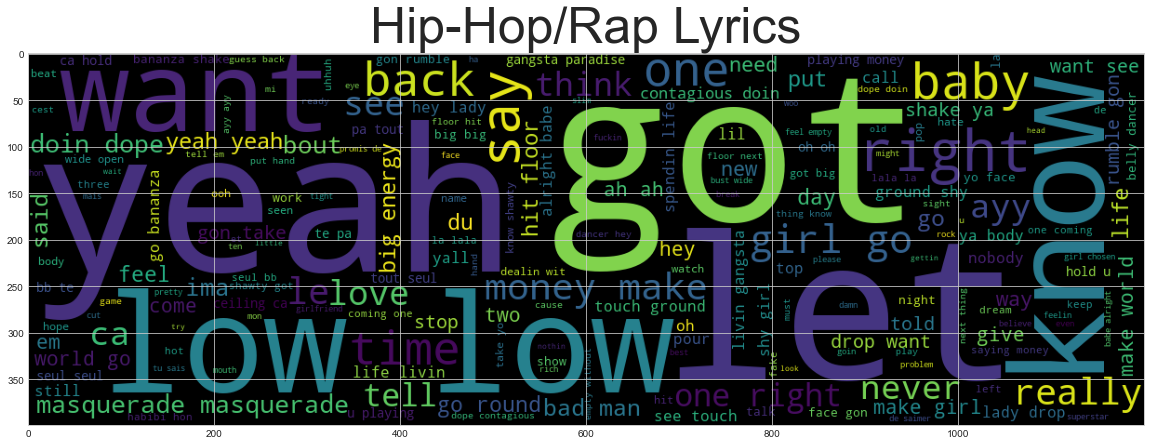

In [144]:
# Generate the Bitcoin word cloud
lyrics_words_joined = ' '.join(lyrics_processed)
wc = WordCloud(width=1200, height=400).generate(lyrics_words_joined)
plt.imshow(wc)
plt.title('Hip-Hop/Rap Lyrics', fontdict={'fontsize':50}, loc='Center')

# Named Entity Recognition
In this section, you will build a named entity recognition model for the hip hop lyrics, then visualize the tags using SpaCy.

In [145]:
new_lyrics_df

,Track Name,Artists,Lyrics,Tokens
41264695,Bananza (Belly Dancer),Akon,"Hey, ladies drop it down Just want to see you ...","[hey, lady, drop, want, see, touch, ground, sh..."
579792092,Own Brand Freestyle,FelixThe1st & Dreya Mac Feat. Finch Fetti,Little niggas really wan' at me (At me) Lockdo...,"[little, really, lockdown, still, doin, cali, ..."
578340247,INDUSTRY BABY,Lil Nas X & Jack Harlow,"D-D-Daytrip took it to ten (hey) Baby back, a...","[dddaytrip, took, ten, hey, baby, back, ayy, c..."
577235374,edamame,bbno$ Feat. Rich Brian,Balls hanging low while I pop a bottle off a y...,"[ball, hanging, low, pop, bottle, yacht, chain..."
578737070,Praise God,Kanye West,"That she wrote, Speech to the Young: Speech to...","[wrote, speech, young, speech, progress, towar..."
585881868,lost souls,Baby Keem Feat. Brent Faiyaz,"It's a lot of hoes in here, lot of lost souls ...","[lot, hoe, lot, lost, soul, whole, group, dime..."
74992451,High School,Nicki Minaj Feat. Lil Wayne,He said he came from Jamaica He owned a couple...,"[said, came, jamaica, owned, couple, acre, cou..."
591239041,Dior,Ruger,"Hmm, ohh-yeah-oh Bad man lookin' good in Dior...","[hmm, ohhyeahoh, bad, man, lookin, good, dior,..."
590487170,One Right Now,Post Malone & The Weeknd,"Na-na-na-na, na-na Na-na-na-na, oh no Yeah, ye...","[nananana, nana, nananana, oh, yeah, yeah, sai..."
585735678,Face Off,"Tech N9ne, Joey Cool, King Iso & Dwayne Johnson","Rumble, they gon' take your face off Spirit o...","[rumble, gon, take, face, spirit, lion, descri..."


In [146]:
new_lyrics_df['Lyrics']

41264695     Hey, ladies drop it down Just want to see you ...
579792092    Little niggas really wan' at me (At me) Lockdo...
578340247    D-D-Daytrip took it to ten (hey)  Baby back, a...
577235374    Balls hanging low while I pop a bottle off a y...
578737070    That she wrote, Speech to the Young: Speech to...
585881868    It's a lot of hoes in here, lot of lost souls ...
74992451     He said he came from Jamaica He owned a couple...
591239041    Hmm, ohh-yeah-oh  Bad man lookin' good in Dior...
590487170    Na-na-na-na, na-na Na-na-na-na, oh no Yeah, ye...
585735678    Rumble, they gon' take your face off  Spirit o...
20056730     As I walk through the valley of the shadow of ...
584725728    Got that real big energy Got that real big ene...
590325377    Yeah, we could be superstars We been ridin' 'r...
542990923    Ay, when it come to you (sheesh) Pistol I bust...
469270443    Astro-naut  What you know about rollin' down i...
217450814    Na-na-na-na (Hey) I heard it before SremmL

In [147]:
new_lyrics_df['Lyrics'].dtype

dtype('O')

In [148]:
new_lyrics_df['Lyrics_str'] = new_lyrics_df['Lyrics'].str.split(',')

In [149]:
new_lyrics_df

,Track Name,Artists,Lyrics,Tokens,Lyrics_str
41264695,Bananza (Belly Dancer),Akon,"Hey, ladies drop it down Just want to see you ...","[hey, lady, drop, want, see, touch, ground, sh...","[Hey, ladies drop it down Just want to see yo..."
579792092,Own Brand Freestyle,FelixThe1st & Dreya Mac Feat. Finch Fetti,Little niggas really wan' at me (At me) Lockdo...,"[little, really, lockdown, still, doin, cali, ...",[Little niggas really wan' at me (At me) Lockd...
578340247,INDUSTRY BABY,Lil Nas X & Jack Harlow,"D-D-Daytrip took it to ten (hey) Baby back, a...","[dddaytrip, took, ten, hey, baby, back, ayy, c...","[D-D-Daytrip took it to ten (hey) Baby back, ..."
577235374,edamame,bbno$ Feat. Rich Brian,Balls hanging low while I pop a bottle off a y...,"[ball, hanging, low, pop, bottle, yacht, chain...",[Balls hanging low while I pop a bottle off a ...
578737070,Praise God,Kanye West,"That she wrote, Speech to the Young: Speech to...","[wrote, speech, young, speech, progress, towar...","[That she wrote, Speech to the Young: Speech ..."
585881868,lost souls,Baby Keem Feat. Brent Faiyaz,"It's a lot of hoes in here, lot of lost souls ...","[lot, hoe, lot, lost, soul, whole, group, dime...","[It's a lot of hoes in here, lot of lost soul..."
74992451,High School,Nicki Minaj Feat. Lil Wayne,He said he came from Jamaica He owned a couple...,"[said, came, jamaica, owned, couple, acre, cou...",[He said he came from Jamaica He owned a coupl...
591239041,Dior,Ruger,"Hmm, ohh-yeah-oh Bad man lookin' good in Dior...","[hmm, ohhyeahoh, bad, man, lookin, good, dior,...","[Hmm, ohh-yeah-oh Bad man lookin' good in Di..."
590487170,One Right Now,Post Malone & The Weeknd,"Na-na-na-na, na-na Na-na-na-na, oh no Yeah, ye...","[nananana, nana, nananana, oh, yeah, yeah, sai...","[Na-na-na-na, na-na Na-na-na-na, oh no Yeah,..."
585735678,Face Off,"Tech N9ne, Joey Cool, King Iso & Dwayne Johnson","Rumble, they gon' take your face off Spirit o...","[rumble, gon, take, face, spirit, lion, descri...","[Rumble, they gon' take your face off Spirit..."


In [150]:
import spacy
from spacy import displacy

In [151]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

In [ ]:
# Run the NER processor on all of the text
hiphop_ner = nlp(lyrics_text)

# Add a title to the document
hiphop_ner.user_data['title'] = 'Hip Hop/Rap NER'

In [ ]:
# Render the visualization
displacy.render(hiphop_ner, style='ent')

In [ ]:
# List all Entities
for ent in hiphop_ner.ents:
    print(ent.text, ent.label_)

In [ ]:
new_lyrics_df.to_csv('hiphoprap_lyrics.csv', index=False)

# Build a Markov Chain Function
We are going to build a simple Markov chain function that creates a dictionary:

- The keys should be all of the words in the corpus
- The values should be a list of the words that follow the keys

In [ ]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
#     for t in text:
#         words = t.split(' ')
#         print(words[0])
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [ ]:
# Create the dictionary for lyrics, take a look at it
# lyrics_dict = new_lyrics_df['Lyrics_str'].apply(markov_chain)

lyrics_dict = markov_chain(lyrics_text)
lyrics_dict

# Create a Text Generator
We're going to create a function that generates sentences. It will take two things as inputs:

- The dictionary you just created
- The number of words you want generated

In [128]:
import random

def generate_sentence(chain, count=15):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [129]:
generate_sentence(lyrics_dict)

"Warned me dead any time my heartbeat And bitch that shit contagious, doin' dope (This."

# Export lyrics to a single .txt file


In [130]:
text = ' '.join(new_lyrics_df['Lyrics'].tolist())

file = open('hiphoprap_text.txt', 'w')
file.write(text)

89872